In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

In [2]:
info_csv = pd.read_csv('../test_data/ready_for_training.csv')

In [3]:
info_csv.head()

,type,use_of_ip,abnormal_url,google_index,count.,count-www,count@,count_dir,count_embed_domian,short_url,...,count-,count=,url_length,hostname_length,sus_url,count-digits,count-letters,fd_length,tld,tld_length
0,0,0,0,1,2,0,0,0,0,0,...,1,0,16,0,0,0,13,0,-1,-1
1,1,0,0,1,2,0,0,2,0,0,...,0,0,35,0,0,1,29,5,-1,-1
2,1,0,0,1,2,0,0,3,0,0,...,0,0,31,0,0,1,25,7,-1,-1
3,2,0,1,1,3,1,0,1,0,0,...,1,4,88,21,0,7,63,9,0,2
4,2,0,1,1,2,0,0,1,0,0,...,1,3,235,23,0,22,199,9,1,3


In [4]:
y = info_csv['type']
X = info_csv.drop('type', axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [6]:
rfc = RandomForestClassifier(n_estimators=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

<AxesSubplot: >

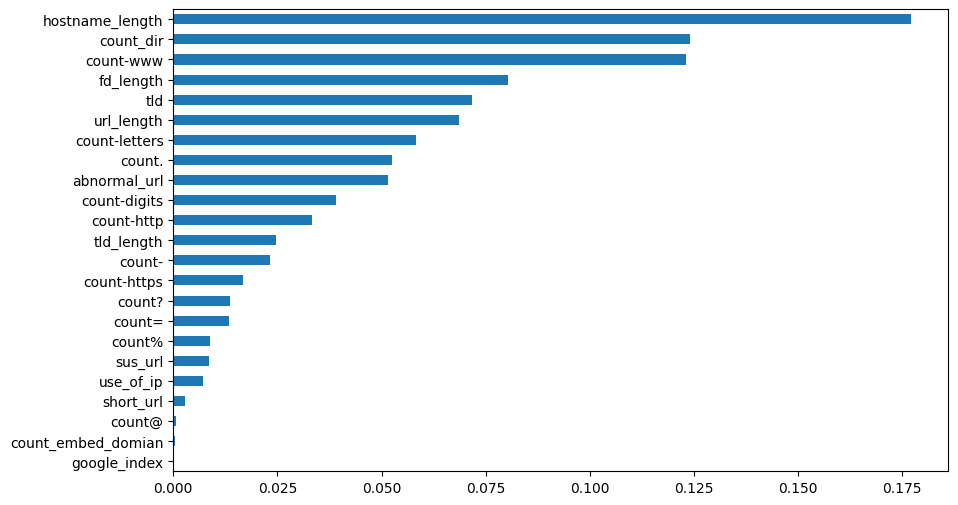

In [7]:
feat_importances = pd.Series(rfc.feature_importances_, index=X_train.columns)
feat_importances.sort_values().plot(kind="barh",figsize=(10, 6))

In [8]:
rfc_pred = rfc.predict(X_test)

In [9]:
print(confusion_matrix(y_test,rfc_pred))

[[ 23511   3211    434     95]
 [  2158 124101      7     18]
 [   195     48  28647     11]
 [   513     51     86   8973]]


In [10]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88     27251
           1       0.97      0.98      0.98    126284
           2       0.98      0.99      0.99     28901
           3       0.99      0.93      0.96      9623

    accuracy                           0.96    192059
   macro avg       0.96      0.94      0.95    192059
weighted avg       0.96      0.96      0.96    192059

